# Memotion analysis

## Context:

In today's world, social media became the most impacting tool on opinion through emotion of users. And one of the top expressing way in networks like of Facebook, Twitter...etc is the art of Memes.

In this project we'll try to predict emotions in an hybrid environment (image & text) that is meme.

When looking at the sentiment felt from a posted meme, we could have a hint about of its author's feelings at the moment. Many analytical companies are exploiting that & more generally social media's posts to target posters with specific marketing, ads & other strategies -As Cambridge Analytica did for past U.S presidential elections, by analysing over 50 millions US facebook users-.

In our case, this also helps study the influence degree that the feeling nature of these images can have on the other users that view it.

## Data Description:

### Abstract

Information on social media comprises of various modalities such as textual, visual and audio. NLP and Computer Vision communities often leverage only one prominent modality in isolation to study social media. However, the computational processing of Internet memes needs a hybrid approach. The growing ubiquity of Internet memes on social media platforms such as Facebook, Instagram, and Twitter further suggests that we can not ignore such multimodal content anymore. To the best of our knowledge, there is not much attention towards meme emotion analysis. The objective of this proposal is to bring the attention of the research community towards the automatic processing of Internet memes. The task Memotion analysis will release 8K annotated memes - with human-annotated tags namely sentiment, and type of humor that is, sarcastic, humorous, or offensive.

### The Multimodal Social Media

In the last few years, the growing ubiquity of Internet memes on social media platforms such as Facebook, Instagram, and Twitter has become a topic of immense interest. Memes are often derived from our prior social and cultural experiences such as TV series or a popular cartoon character. These digital constructs are so deeply ingrained in our Internet culture that to understand the opinion of a community, we need to understand the type of memes it shares. When malicious users upload something offensive to torment or disturb people, it traditionally has to be seen and flagged by at least one human, either an user or a paid worker. Even today, companies like Facebook and Twitter rely extensively on outside human contractors from start-ups like CrowdFlower, or companies in the Philippines. But with the growing volume of multimodal social media, it is becoming impossible to scale. The detection of offensive content on online social media is an ongoing struggle. OffenseEval is a shared task which is being organized since the last two years at SemEval. But, detecting an offensive meme is more complex than detecting an offensive text – it involves visual cue and language understanding. This is one of the motivating aspects which encourages us to propose this task. A few researchers have tried to automate the meme generation process, while a few others tried to extract its inherent sentiment in the recent past. Nevertheless, a lot more needs to be done to distinguish their finer aspects such as type of humor or offense.

# Part 1 : Preprocessing & Data visualization

Before entering in serious things, let's talk about the objectives to do with this dataset.
The dataset consist of an image folder & a csv file containing classification of each image (meme) the text that accompany it and primary sentiment with degrees for each one, to determine the general sentiment of the memes.

In this project, I'll work on a very recent approach that emerged in this last decade : Multimodal labelization. The multimodal social media combine both textual & visual aspects as an expressing way.

We'll detail our data later, but for now, let's just import basic libraries I'll use (we'll add further later for some code cells when necessary).

In [31]:
# Importing libraries to use

import re # Regular expression used for text cleaning
import string # Also used for text preprocessing tasks

# Classic Machine Learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tqdm import tqdm # From arabic word "ta9adoum", it display a progression bar when executing tasks

# Deep Learning & Neural Networks libraries

import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from tensorflow.keras.layers import Conv1D, Embedding, GlobalAveragePooling1D 
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

After uploading the csv file to our workspace we'll check it as following :

In [3]:
data = pd.read_csv('labels.csv')
data.head()

Unnamed: 0    image_name  ...      motivational overall_sentiment
0           0   image_1.jpg  ...  not_motivational     very_positive
1           1  image_2.jpeg  ...      motivational     very_positive
2           2   image_3.JPG  ...  not_motivational          positive
3           3   image_4.png  ...      motivational          positive
4           4   image_5.png  ...  not_motivational           neutral

[5 rows x 9 columns]

**Features/Labels :**

* ***unnamed :*** a column that seems giving position of each data row.
* ***image_name :*** display the name of images contained in the image folder.
* ***text_ocr:*** ocr meaning Optical Character Recognition is a method to detect characters visually. This feature can be considered as a primary ocerized text from images through one of ocerisation methods or software.
* ***text_corrected:*** Another text column which is more like final correction of memes texts than those of ocr ones.
* ***humour:*** one of primary sentiment it contains ordinal values of humour.
* ***sarcasm:*** 2nd primary sentiment containing ordinal values for sarcasm status.
* ***offensive:*** aggressive sentiment, its values are degree levels of offense.
* ***motivational:*** last primary sentiment, formed by binary categorical values (motivational or not/ Yes or No).
* ***overall_sentiment:*** The overall sentiment classification for memes.



Next, I'll procede with preprocessing dataset, the is the most important step of all as it represents ~ 80% of the work. Better preprocessing generally means better fit data for better models.

In [4]:
data.describe() # return only 'number' dtypes informations such as quartiles, standard deviation, mean & count.

Unnamed: 0
count  6992.000000
mean   3495.500000
std    2018.560873
min       0.000000
25%    1747.750000
50%    3495.500000
75%    5243.250000
max    6991.000000

## Preprocessing

In this part I'll only treat csv data. We'll see later that since this dataset is complex as it is multimodal, it also need to be treated for each of its modality (texts, images). So in this part I'll only clean the dataframe with classical methods seen in Machine learning part.

In [5]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True) # delete (drop) 'unnamed' column
data = data.drop(columns = ['text_ocr']) # drop 'text_ocr' column
data.head() # return n first rows of data (by default it's 5)

image_name  ... overall_sentiment
0   image_1.jpg  ...     very_positive
1  image_2.jpeg  ...     very_positive
2   image_3.JPG  ...          positive
3   image_4.png  ...          positive
4   image_5.png  ...           neutral

[5 rows x 7 columns]

In [6]:
data[data.isnull().any(axis=1)] # return any row where there are missing values.

image_name text_corrected  ...      motivational overall_sentiment
119    image_120.jpg            NaN  ...  not_motivational          positive
4799  image_4800.jpg            NaN  ...      motivational           neutral
6781  image_6782.jpg            NaN  ...  not_motivational          positive
6784  image_6785.jpg            NaN  ...  not_motivational          positive
6786  image_6787.jpg            NaN  ...      motivational          positive

[5 rows x 7 columns]

In [7]:
full_data = data.copy()
full_data.isnull().any() # return boolean value for features whether there is missing values in it or not

image_name           False
text_corrected        True
humour               False
sarcasm              False
offensive            False
motivational         False
overall_sentiment    False
dtype: bool

In [8]:
clean_data = data.copy()
clean_data.dropna(inplace=True) # drow row(s) where there are missing values
clean_data.isnull().any() # check again that there is no more missing values

image_name           False
text_corrected       False
humour               False
sarcasm              False
offensive            False
motivational         False
overall_sentiment    False
dtype: bool

In [9]:
print('original data shape: ',data.shape) # shape of data (matrix like with (number_rows, number_columns ))
print('cleaned data shape: ',clean_data.shape) # shape of cleaned_data

original data shape:  (6992, 7)
cleaned data shape:  (6987, 7)


Now that it seems we finished dataframe cleaning, let's visualize some parts in it. but for now. just take a look at some dataframe that we could visualize next.

In [10]:
data.groupby(['offensive']).count() # we group columns according to each 'offensive' value count. Missings in 'text_corrected' are simply due to the fact
                                    # we treated data & not cleaned_data otherwise it should display the least one counts

image_name  text_corrected  ...  motivational  overall_sentiment
offensive                                      ...                                 
hateful_offensive         221             221  ...           221                221
not_offensive            2713            2710  ...          2713               2713
slight                   2592            2591  ...          2592               2592
very_offensive           1466            1465  ...          1466               1466

[4 rows x 6 columns]

## Visualization

In this part, I'll display graphics for a better understanding of the dataframe & more generally, to see distribution, relation & most importants hidden parts that ties or not dataframe's features.

***Note :*** I'm always choosing plotly mainly since it offers a dynamic & better graphics than static & classical matplotlib or seaborn do.

First let's check distribution of each sentiment degree levels (including overall sentiment).

In [41]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
plotly.io.renderers.default = 'colab'

fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}, None, {'type':'domain'}],
                                           [{'type':'domain'}, None, {'type':'domain'}],
                                           [None, {'type':'domain'}, None]]
                    , subplot_titles=("Humour","Sarcasm", "Offensive", "Motivational", "Overall Sentiment"))

fig.add_trace(go.Pie(labels=data.iloc[:, 2]),1, 1)
fig.add_trace(go.Pie(labels=data.iloc[:, 3]),1, 3)
fig.add_trace(go.Pie(labels=data.iloc[:, 4]),2, 1)
fig.add_trace(go.Pie(labels=data.iloc[:, 5]),2, 3)
fig.add_trace(go.Pie(labels=data.iloc[:, 6]),3, 2)

fig.update_layout(title_text="Sentiment nature from memes",
                  title_x=0.5,
                  title_font=dict(size=25, family='Verdana', 
                             color='darkred'),
                  legend=dict(yanchor='middle',y=0.65,
                              xanchor='right',x=0.6),
                  height=800, width=900,
                  )

fig.show()

The next figure is called a <u>**sunburst**</u> it's like a nested pie chart but far more developped. Try explore different distribution of sentiment nature & their level with parent (most inner circle) label is composed of 'overall_sentiment' values.

**<u>*IMPORTANT :*</u>** after this pip install below, we have to restart execution to be able to execute sunburst figure.

In [11]:
!pip install plotly==4.8.2

In [38]:
fig = px.sunburst(data, path=['overall_sentiment', 'motivational', 'offensive', 'humour', 'sarcasm'], branchvalues='total', height=1000, width=1000)
fig.show()

# notes : path : from 1st(parent) to last label values, branchvalues : has total (full circle) or 'remainder' certain part of circle
# for more info about sunburst : https://plotly.com/python/sunburst-charts/

For this next visualization, I used a barplot for counting 'overall_sentiment' according to each primary sentiment.

Some infos:

* As seen in previous figures, overall's positive is the most dominant overall_sentiment in each sentiment class (humour to motivational)
* Most humurous memes are very funny, meanwhile those that are not are more neutral than positive. Also, hilarious memes are few compared to other humour values.
* Sarcastic memes are mainly both positive & general, while those of very_twisted meaning are few but positive. The not_sarcastic ones are either positive or neutral for most of them.
* Aggressive memes have mostly either 'not_offensive' or slight values, with 1st category divided nearly equally between positive & neutral (~ 200 count difference)
* For motivational's binary labels, 'not_motivational' represent 2/3rd total count with negative & very_negative traits being the most dominant from all primary sentiment (335 & 105 for negative & very_negative respectively) -from sunburst figure- 

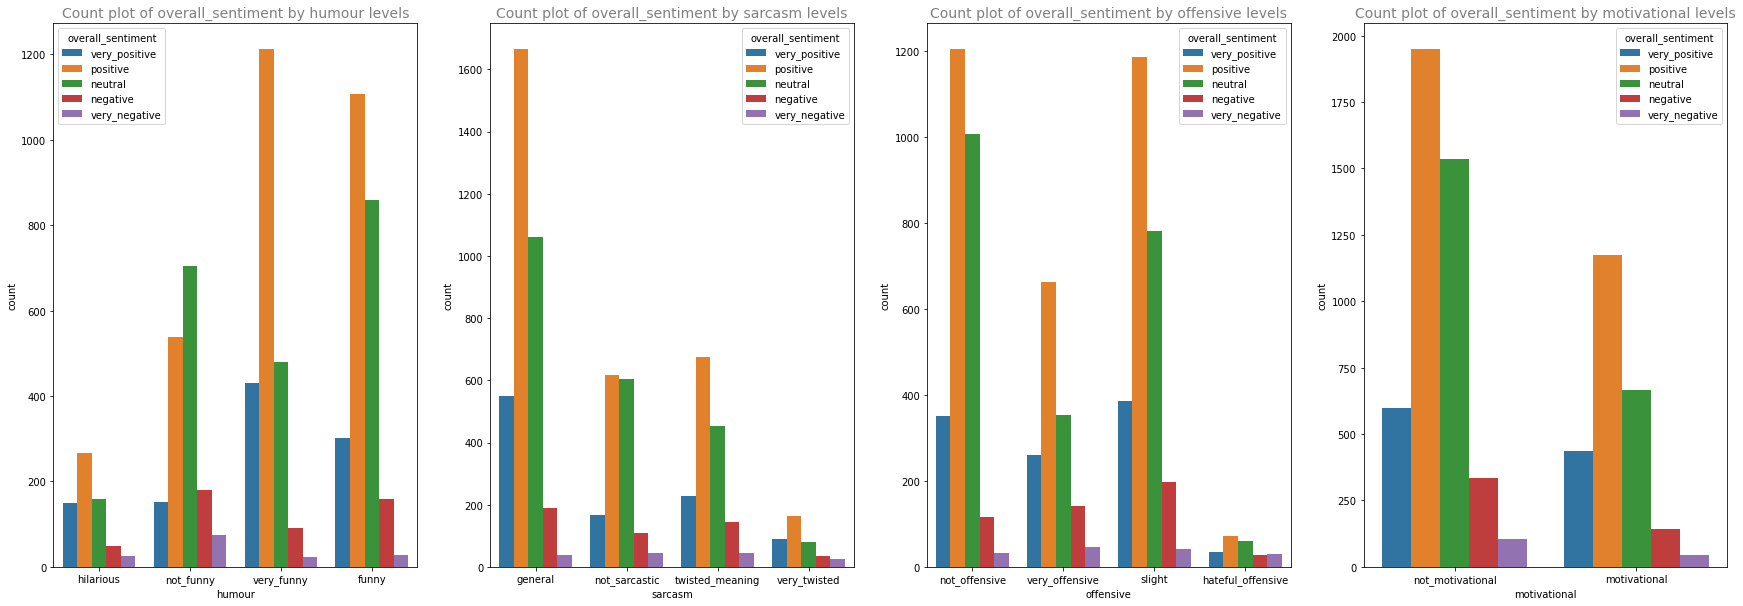

In [ ]:
import seaborn as sns

#Comparative countplots of overall_sentiments values according to primary feelings :

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(30,10))
sns.countplot(data=clean_data, x='humour', hue="overall_sentiment", ax=ax1)
ax1.set_title('Count plot of overall_sentiment by humour levels', color='grey', fontsize=14)

sns.countplot(data=clean_data, x='sarcasm', hue="overall_sentiment", ax=ax2)
ax2.set_title('Count plot of overall_sentiment by sarcasm levels', color='grey',fontsize=14)

sns.countplot(data=clean_data, x='offensive', hue="overall_sentiment", ax=ax3)
ax3.set_title('Count plot of overall_sentiment by offensive levels', color='grey', fontsize=14)

sns.countplot(data=clean_data, x='motivational', hue="overall_sentiment", ax=ax4)
ax4.set_title('Count plot of overall_sentiment by motivational levels', color='grey', fontsize=14)
fig.show()

## Correlation
In my previous projects, I always worked on mixed categorical/numerical dataset labels or full numerical. This time I had a full categorical (ordinal) labels & then, the question is : since we saw the correlation matrix that describe numerical features connexion, is there another one way to describe relation between only numerical feature ?

The answer is : Yes. Thanks to statistical & mathematical approches, there exists something called : **Cramer's V**

To put it simple, Crammer's V coefficient is based on a normalized (centered-reduced) Pearson's chi-squared statistic & thus, varies from 0 to 1. It's name refers to the swedish mathematician that developped it's following formula : Harald Cramer.

![Formula](http://www.modalisa.com/images/support/lexique/img2B.gif)

where $\chi^2$ is the chi-squared statistic, $\chi^2_{max}$ chi-squared max

$n$ the sample size, & $min(l,c)$ represents minimum between number of lines (rows) & number of columns.

Next are various methods to calculate Cramer's $V$.

In [ ]:
# For the cleaned data

import scipy.stats as ss

def cramers_corrected_stat(x,y):

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

labels = ["humour", "sarcasm", "offensive", "motivational"]

for l in labels:
  print("""The Cramer's V for """ + str(l) + " is :", (cramers_corrected_stat(clean_data[l], clean_data["overall_sentiment"])))


The Cramer's V for humour is : 0.153474
The Cramer's V for sarcasm is : 0.089011
The Cramer's V for offensive is : 0.112768
The Cramer's V for motivational is : 0.090339


The results above gives V correlation between each sentiment and overall_sentiment

Below is another method. calculated for "humour" label.

In [ ]:
degrees = ['not_funny', 'funny', 'very_funny', 'hilarious']
levels = ['very_negative', 'negative', 'neutral', 'positive', 'very_positive']
confusions = []
for degree in degrees:
  for level in levels:
    cond = (data['humour'] == degree) & (data['overall_sentiment'] == level)
    confusions.append(cond.sum())
confusion_matrix = np.array(confusions).reshape(len(degrees), len(levels))

def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

result = cramers_stat(confusion_matrix)
print(result)

0.15496040396178887


Finally, this is a dataframe that looks like correlation matrix for numerical features : Diagonals are all one_likes while rows & columns have transposed values.

As for correlation matrix :

* If $V \mapsto 0$ means those 2 categories(variables) are independant -unrelated-
* If $V \mapsto 1$ means those 2 categories(variables) are dependant -related-

In [ ]:
# Import association_metrics  
! pip install association-metrics
import association_metrics as am
# Convert you str columns to Category columns
cramers_df = data.apply(lambda x: x.astype("category") if x.dtype == "O" else x)

cramers_df=cramers_df.drop(data[["image_name", "text_corrected"]], axis=1)
# Initialize a CramersV object using you pandas.DataFrame
cramersv = am.CramersV(cramers_df) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are 
# the categorical variables of the passed pandas.DataFrame
cramersv.fit()

  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3952 sha256=4b642179123a69612d97680b3993aa115080d39cba08c8779fbf22329d550f83
  Stored in directory: /root/.cache/pip/wheels/2d/1e/07/287b993a07cc41eade32a9b863d6d4686f985d72344a9e0911
Successfully built association-metrics


humour   sarcasm  ...  motivational  overall_sentiment
humour             1.000000  0.173833  ...      0.047483           0.154960
sarcasm            0.173833  1.000000  ...      0.185038           0.092102
offensive          0.138351  0.294028  ...      0.305369           0.115202
motivational       0.047483  0.185038  ...      1.000000           0.093114
overall_sentiment  0.154960  0.092102  ...      0.093114           1.000000

[5 rows x 5 columns]

From the Cramer's $V$ table, we can see a weak average relation between sarcasm & offensive and also between offensive & motivational. This confirms what we deducted from visualization analysis.

Now that we saw all those things, I'll do even further preprocessing.

## More processing

I replaced each label's value by a number starting 0 & incrementing it by 1.

Since sentiment degrees have an ordinal nature, I classed them from "lowest" to "top" (example : humour (from not funny to hilarious).

**Note :** There many other ways to proceed like that, for example, we could use a scikit learn's labelencoder() function, & then transform it dtype to 'int' -this method will attribute numbers according to original values alphabetical order so it won't respect the ordinal aspect but rather be a nominal one-

### Dataframe

In [ ]:
data = data.replace({'humour': {'not_funny': 0, 'funny': 1, 'very_funny': 2, 'hilarious':3},
            'sarcasm': {'not_sarcastic': 0, 'general': 1, 'twisted_meaning': 2, 'very_twisted': 3},
            'offensive': {'not_offensive': 0, 'slight': 1, 'very_offensive': 2, 'hateful_offensive': 3},
            'motivational': {'not_motivational': 0, 'motivational': 1},
            'overall_sentiment': {'very_negative': 0, 'negative': 1, 'neutral': 2, 'positive': 3, 'very_positive': 4}})

data

image_name  ... overall_sentiment
0        image_1.jpg  ...                 4
1       image_2.jpeg  ...                 4
2        image_3.JPG  ...                 3
3        image_4.png  ...                 3
4        image_5.png  ...                 2
...              ...  ...               ...
6987  image_6988.jpg  ...                 2
6988  image_6989.jpg  ...                 2
6989  image_6990.png  ...                 3
6990  image_6991.jpg  ...                 4
6991  image_6992.jpg  ...                 3

[6992 rows x 7 columns]

In [ ]:
# Import label encoder
#from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
#for i in range(2,6):
  #data.iloc[:, i] = label_encoder.fit_transform([str(col) for col in data.iloc[:, i]])

#data

# Part 2 : Multimodal model

## A) Image


### Preprocessing

After preprocessing dataframe, I'll go next to images & here things will start to be more difficult as we slowly will progress from classic machine learning field to deep learning domain.

In [18]:
from PIL import ImageFile, ImageOps
ImageFile.LOAD_TRUNCATED_IMAGES = True

import os
import PIL
import pathlib
import random

I started by importing images from my google drive folder.

In [ ]:
path = '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/'
data_dir = pathlib.Path(path)
image_count = len(list(data_dir.glob('*')))
print(image_count)

7000


Then displaying a random image from the folder

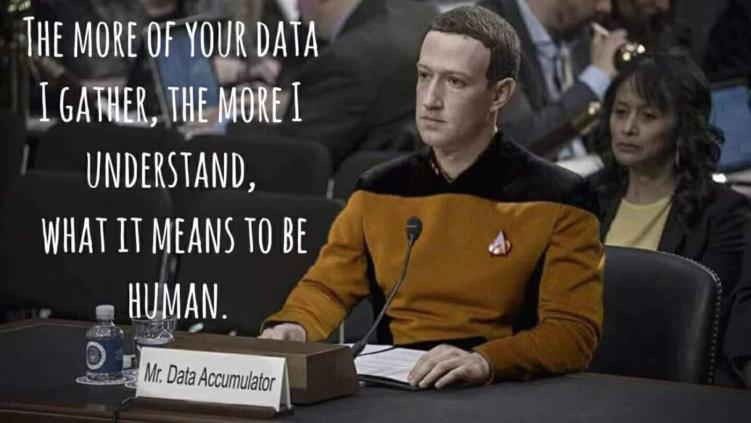

In [ ]:
image_ds = list(data_dir.glob('*'))
PIL.Image.open(str(random.choice(image_ds)))

Then creating an empty list that we fill with the images.

In [ ]:
import random
from PIL import Image

path = '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/'
image_list = []

names = random.choices(os.listdir(path), k=image_count)
for filename in names: 
    full_path = os.path.join(path, filename)
    if os.path.isfile(full_path):
        img = Image.open(full_path)
        image_list.append(img)

Here's an example of a 5 x 5 matrix of images from the newly created list.

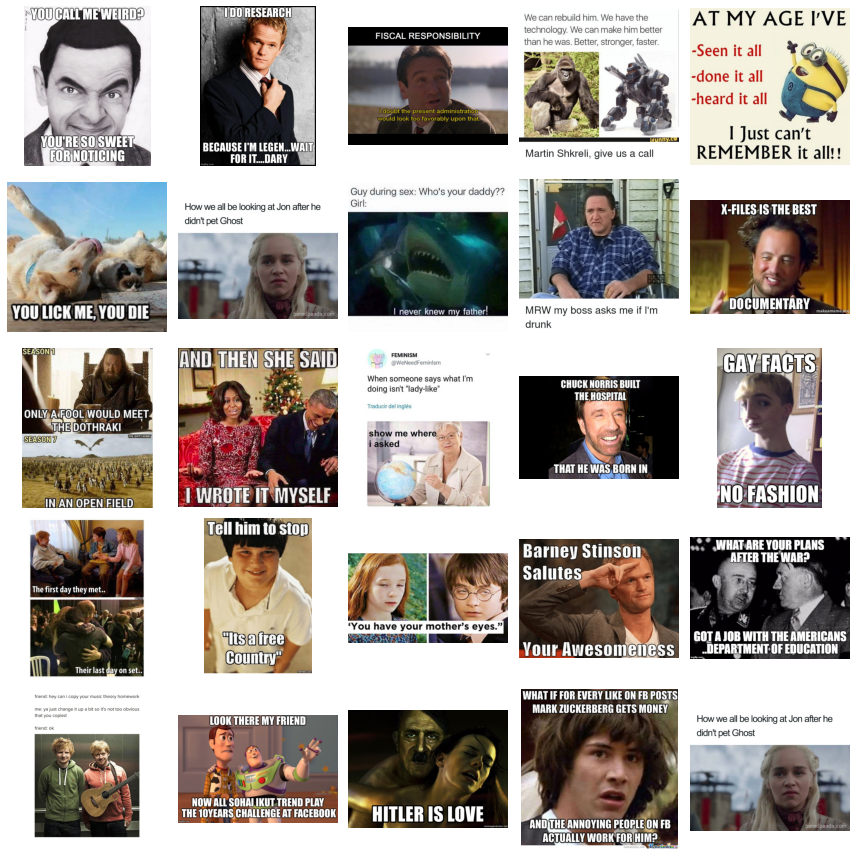

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(12, 12))

for i in range(5):
    for j in range(5):
        index = np.random.randint(image_count)
        axes[i][j].imshow(image_list[index])
        axes[i][j].axis('off')
        plt.tight_layout()

Now we'll repeat nearly same step but with few changes :

1. I fixed the height & width of image to a size of (h,w) = (100,100); I tried it with a size of (224,224) to be able to use a tensorflow_hub pretrained model with it later, but the generated images were so memory hungry that colab crashed due to excess of memory consumption - allocated RAM-
2. Transform each image to array : This is the most important part as machine doesn't know how to treat this kind of data directly, but rather as numbers only.
3. Rescaling the generated arrays to make easier computation.

I did this step for both original data & cleaned data.

In [ ]:
width = 100
height = 100
X_full = []
X_full_path = []
for i in tqdm(range(full_data.shape[0])):
    path = '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/'+full_data['image_name'][i]
    img = image.load_img(path,target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255.0
    X_full.append(img)
    X_full_path.append(path)

 93%|█████████▎| 6507/6992 [01:06<00:04, 112.17it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 95%|█████████▌| 6670/6992 [01:08<00:03, 93.32it/s] /usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 6992/6992 [01:11<00:00, 97.71it/s]


In [ ]:
width = 100
height = 100
X_cleaned = []
X_cleaned_path = []
for i in tqdm(range(clean_data.shape[0])):
    if i in [119, 4799, 6781, 6784, 6786]:
        pass
    else:
        path = '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/'+clean_data['image_name'][i]
        img = image.load_img(path,target_size=(width,height,3))
        img = image.img_to_array(img)
        img = img/255.0
        X_cleaned.append(img)
        X_cleaned_path.append(path)

 93%|█████████▎| 6501/6987 [01:04<00:04, 110.60it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 95%|█████████▌| 6669/6987 [01:06<00:02, 118.20it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 6987/6987 [01:09<00:00, 100.94it/s]


In the next 2 code cells, I deleted corrupted or missing images (1st code), then also deleted the variables we won't use later. (optimization purpose)

In [ ]:
deleted_paths = [paths for paths in X_full_path + X_cleaned_path if paths not in X_full_path or paths not in X_cleaned_path]
deleted_paths

['/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_120.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_4800.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6782.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6785.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6787.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6988.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6989.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6990.png',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6991.jpg',
 '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/image_6992.jpg']

In [ ]:
delete_var = [full_data, clean_data, X_cleaned, X_full, X_cleaned_path, X_full_path]
for i in delete_var:
    del i

  As written earlier, now I did the explained steps for clean_data and added a last line : X.append(img)

In [ ]:
width = 100
height = 100
X = []
for i in tqdm(range(clean_data.shape[0])):
    if i in [119, 4799, 6781, 6784, 6786]:
        pass
    else:
        path = '/content/drive/MyDrive/Memotion/memotion_dataset_7k/images/'+clean_data['image_name'][i]
        img = image.load_img(path,target_size=(width,height,3))
        img = image.img_to_array(img)
        img = img/255.0
        X.append(img)

 93%|█████████▎| 6507/6987 [01:04<00:04, 112.44it/s]/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
 95%|█████████▌| 6670/6987 [01:06<00:02, 120.23it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 6987/6987 [01:09<00:00, 100.50it/s]


The newly created variable X is a list of arrays of images. Transforming that list to an array result on a very long array where each element of that list is an array (so it's an array of array). Something like :

[[a], [b], [c]] $\rightarrow$ [[a, b, c]]

In [ ]:
X = np.array(X)

The shape of X means : (number_of_images, height, width, Colors_of_images);
For colors, it's important to decide whether they are important or not in the construction of model.

Some problems needs to work on grey scaled images (only white & black shades), while others needs RGB (red, blue, green) to get a better model.

In this case, that's the 2nd option that'll be opted for.

In [ ]:
X.shape

(6982, 100, 100, 3)

The next few codes are just another cleaning for dataframe.

In [ ]:
rows_to_drop = ['image_120.jpg',
              'image_4800.jpg',
              'image_6782.jpg',
              'image_6785.jpg',
              'image_6787.jpg',
              'image_6988.jpg',
              'image_6989.jpg',
              'image_6990.png',
              'image_6991.jpg',
              'image_6992.jpg']

In [ ]:
clean_data = data
clean_data.head()

image_name  ... overall_sentiment
0   image_1.jpg  ...                 4
1  image_2.jpeg  ...                 4
2   image_3.JPG  ...                 3
3   image_4.png  ...                 3
4   image_5.png  ...                 2

[5 rows x 7 columns]

In [ ]:
for images in rows_to_drop:
  clean_data.drop(clean_data[clean_data['image_name'] == images].index, inplace=True)

In [ ]:
clean_data.shape

(6982, 7)

In [ ]:
np.save('image_array', X)

While X will be the data related to images (image analysis), Y will be the data related to dataframe (sentiment analysis).

With that we put basis for the multimodal meme sentiment analysis.

In [ ]:
Y = clean_data.iloc[:,2:]
Y.shape

(6982, 5)

Some examples of random images from X displayed.

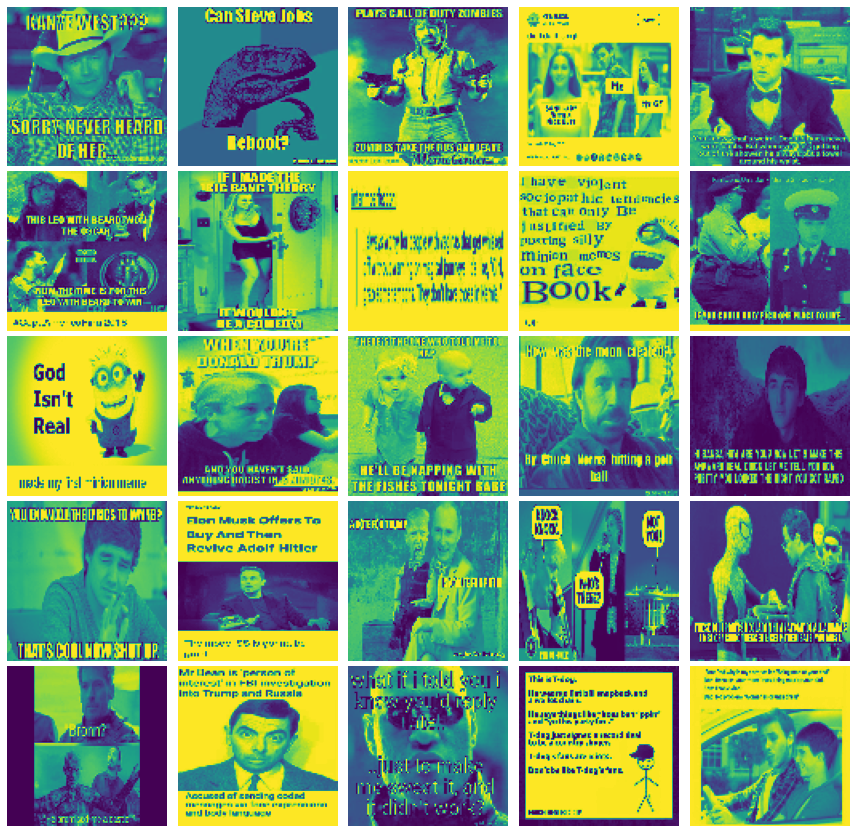

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(12, 12))

for i in range(5):
    for j in range(5):
        index = np.random.randint(X.shape[0])
        axes[i][j].imshow(X[index,:,:,0])
        axes[i][j].axis('off')
        plt.tight_layout()

### Building model

* ### Image layers

Though I made X & Y, we can't directly procede to building model.

One of the biggest problem with deep learning is that it's very data hunger; it needs huge amount of data to build the best models. That' when we lack data quantity, we could use what we call : **Data Augmentation**.

It's augmenting volume of data with some basic editing (rescale, flip, crop, rotation...etc). This offer more data to learn with to elaborate better models.

In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling, Dropout

data_augmentation = tf.keras.Sequential()
data_augmentation.add(RandomFlip('horizontal_and_vertical', input_shape=(100,100,3)))
data_augmentation.add(RandomRotation(0.2))
                                      
preprocess_input = tf.keras.applications.resnet_v2.preprocess_input

rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

***Transfer Learning*** : The idea is to use existing models & apply them (or part of them) to our own model.

In [ ]:
#transfer_learning models :
import tensorflow_hub as hub

tl_model_1 = tf.keras.applications.ResNet50(input_shape=X[0].shape,
                                               include_top=False,
                                               weights='imagenet')
tl_model_1.summary()

tl_model_2 = tf.keras.applications.VGG16(input_shape=X[0].shape,
                                               include_top=False,
                                               weights='imagenet')
tl_model_2.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [ ]:
tl_model_1.trainable = False
tl_model_2.trainable = False

In [ ]:
gap_2d = GlobalAveragePooling2D()

***Train/Test Split*** : Usually we also need a validation part extracted from train, to valid the train & show us cases of overfitting in running model phase or used for tuning hyper-parameters.

I couldn't build that as there was no such related file in this dataset - tried manually but had some sample size issues, that's why I removed it -

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=20)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 20) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (5585, 100, 100, 3)
X_test shape: (1397, 100, 100, 3)
y_train shape: (5585, 5)
y_test shape: (1397, 5)


In [ ]:
del X # since we don't need it after splitting

Here's the layers of images for our model.

* I inducted the original shape, then used data augmentation to increase data volume, then preprocess that.

* 2nd step was using the transfer learning method with the 2 models seen earlier (resnet50v_2 & vgg16)

* Concatenate both layers of TL (transfer learning) & apply a global average pooling2D for the 1st pretrained model & finally make a dropout layer for it.

* Apply a global average pooling to 1st layer of our transfer learning (Resnet50)

* Use a dropout layer to make calculations faster.

In [ ]:
image_input = tf.keras.Input(shape=(100, 100, 3), name = 'image_input')
image_layers= data_augmentation(image_input)
image_layers = preprocess_input(image_layers)
layer_tlm_1 = tl_model_1(image_input, training=False)
layer_tlm_1 = Conv2D(2048, kernel_size=2,padding='valid')(layer_tlm_1)
layer_tlm_1 = Dense(512)(layer_tlm_1)
layer_tlm_2 = tl_model_2(image_input, training=False)
layer_tlm_2 = Dense(1024)(layer_tlm_2)
layers = tf.keras.layers.concatenate([layer_tlm_1, layer_tlm_2])
image_layers_gap = gap_2d(layer_tlm_1)
image_layers = Dropout(0.2, name = 'dropout_layer')(image_layers_gap)

## B) Text

Now that we finished the Image treatment, we'll proceed to the hardest part (since NLP is one of the most difficult field of AI).

The steps will be explained as follows :

1. Text Preprocessing (cleaning)
2. Text to features (Feature Engineering on text data)
3. Text classification (text classification)


### Text Preprocessing

Probably the most important step (we start accustomed to that now) is preprocessing : Usually, we start by **tokenization** & **stemmization** steps, but since the object of data are memes & not administrative document, I just skipped these steps. But it's not really recommanded though.

So I directly passed to <u>**standardization**</u> (or normalization) of text :

This step consists of cleaning all data text we have before proceeding to the next one. it arrives as a last step sometimes, before starting the feature engineering of corrected data, mainly, it's preceded by the steps quoted above.

I created a function & then used the regular expression library to correct text & then applied that function to our data's text_corrected label.

In [ ]:
def standardization(data):
    data = data.apply(lambda x: x.lower()) # to make text as small letters
    data = data.apply(lambda x: re.sub(r'\d+', '', x)) # use backreference (\r) to replace (substitute) 1 or more digit characters between (0-9) with empty space
                                                       # or to put it simple, it remove digits characters
    data = data.apply(lambda x: re.sub(r'.com', '', x, flags=re.MULTILINE)) # same as previous line, this remove url text (finishing with ".com") for each line 
    data = data.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation))) # replace all empty space within all data text by itself & remove punctuations
    return data

data['text_corrected'] = standardization(data.text_corrected)

### Text to features

Now that the 1st step is finished, it's time to make some transformation to our text data.

As explained in the image part, a computer isn't designed to understand human language; That's why a text also needs to be transformed in something a machine could comprehend & use to offer the expected results.

For images, we transformed them as arrays. For text we'll do what is called : **Text vectorization**.

These are basically same techniques, the difference is only the libraries it requires (since data types are quite different).

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
vocab_size = 10000 # words size
sequence_length = 200 # maximum sequence length

vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

text_ds = np.asarray(data['text_corrected']) # transform data.text_corrected feature into an array
vectorize_layer.adapt(tf.convert_to_tensor(text_ds)) # convert the previous arrays of texts to tensors

# All this cell codes describes transformation of text into tensors, an object that a machine could handle.

The 2nd step is done. But consider it as a sample of how it works. As this task is also very important & could took more or less codes depending on volume, objective & preprossessing nature of task to be done.

And time's to build the model but before : the usual ***Train/Test split*** for text as done for images before.

In [ ]:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(clean_data.text_corrected, Y, test_size = 0.2, random_state=20)

### Model for text data

It's time to build the model for text part.

Steps are explained as follows :

* We fix an embedding dimension & create a tensorflow string dtype layer

* Initialize that layer for the vectorized layer obtained just above

* Embedding layer is used to turns positive integers (indexes) into dense vectors of fixed size. So it's applied on words size & the embedding dimension
(expecting to have (None, 200, 32) shape, where "None" is for batch size & then applied a dropout to the obtained layer.

* The most important thing done is using the LSTM (Long Short Term Memory) layer with bidirectional option. LSTM is a classic library & tool used for NLP & biderectionnal means simply that it'll calculate probability of sequence meaning from both reading direction (left to right & inversely).

* Classic convolutions & pooling layers. Noe that it's 1D & not 2D since it's text & not image that had height * width (2D) dimensions.

* Add vanilla hidden layers : The term mean that they're just regular feed-forward network with only single hidden layers (so without any fancy stuff)


In [ ]:
embedding_dim=32

text_input = tf.keras.Input(shape=(None,), dtype=tf.string, name='text')
text_layers = vectorize_layer(text_input)
text_layers = tf.keras.layers.Embedding(vocab_size, embedding_dim, name="embedding")(text_layers)
text_layers = tf.keras.layers.Dropout(0.5)(text_layers)

text_layers = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, activation='relu', return_sequences=True))(text_layers)

text_layers = tf.keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(text_layers)
text_layers = tf.keras.layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(text_layers)
text_layers = tf.keras.layers.GlobalMaxPooling1D()(text_layers)

# We add a vanilla hidden layers:
text_layers = tf.keras.layers.Dense(2048, activation="relu")(text_layers)
text_layers = tf.keras.layers.Dropout(0.5)(text_layers)

#Part 3 : The Final model

We're near the end : Concatenating both image layers & text layers to get an overall layer which will give us the prediction for that multimodal model.

In [ ]:
concatenate = tf.keras.layers.concatenate([image_layers, text_layers], axis=1)

In [ ]:
overall_layer = tf.keras.layers.Dense(2048, activation='softmax')(concatenate)

Naturally, for each sentiment, there's it's ordinal classification prediction.

In [ ]:
prediction_layer_1 = tf.keras.layers.Dense(4, activation='softmax', name = 'sarcasm')
prediction_layer_2 = tf.keras.layers.Dense(4, activation='softmax', name = 'humour')
prediction_layer_3 = tf.keras.layers.Dense(4, activation='softmax', name = 'offensive')
prediction_layer_4 = tf.keras.layers.Dense(1, activation='sigmoid', name = 'motivational')
prediction_layer_5 = tf.keras.layers.Dense(5, activation='softmax', name = 'overall')

The multimodal model will have image and text models as inputs & 5 outputs, each one is also divided to it's respective ordinal values.

In [ ]:
output_1 = prediction_layer_1(overall_layer)
output_2 = prediction_layer_2(overall_layer)
output_3 = prediction_layer_3(overall_layer)
output_4 = prediction_layer_4(overall_layer)
output_5 = prediction_layer_5(overall_layer)
model = tf.keras.Model(inputs = [image_input, text_input] , outputs = [output_1, output_2, output_3, output_4, output_5])

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.2 MB/s 


In [ ]:
import tensorflow_addons as tfa

This is now the final stage of our project as the model is being built (loss, metrics & optimizers). Then I added the model architecture plot which sums up all what I've explained till now.

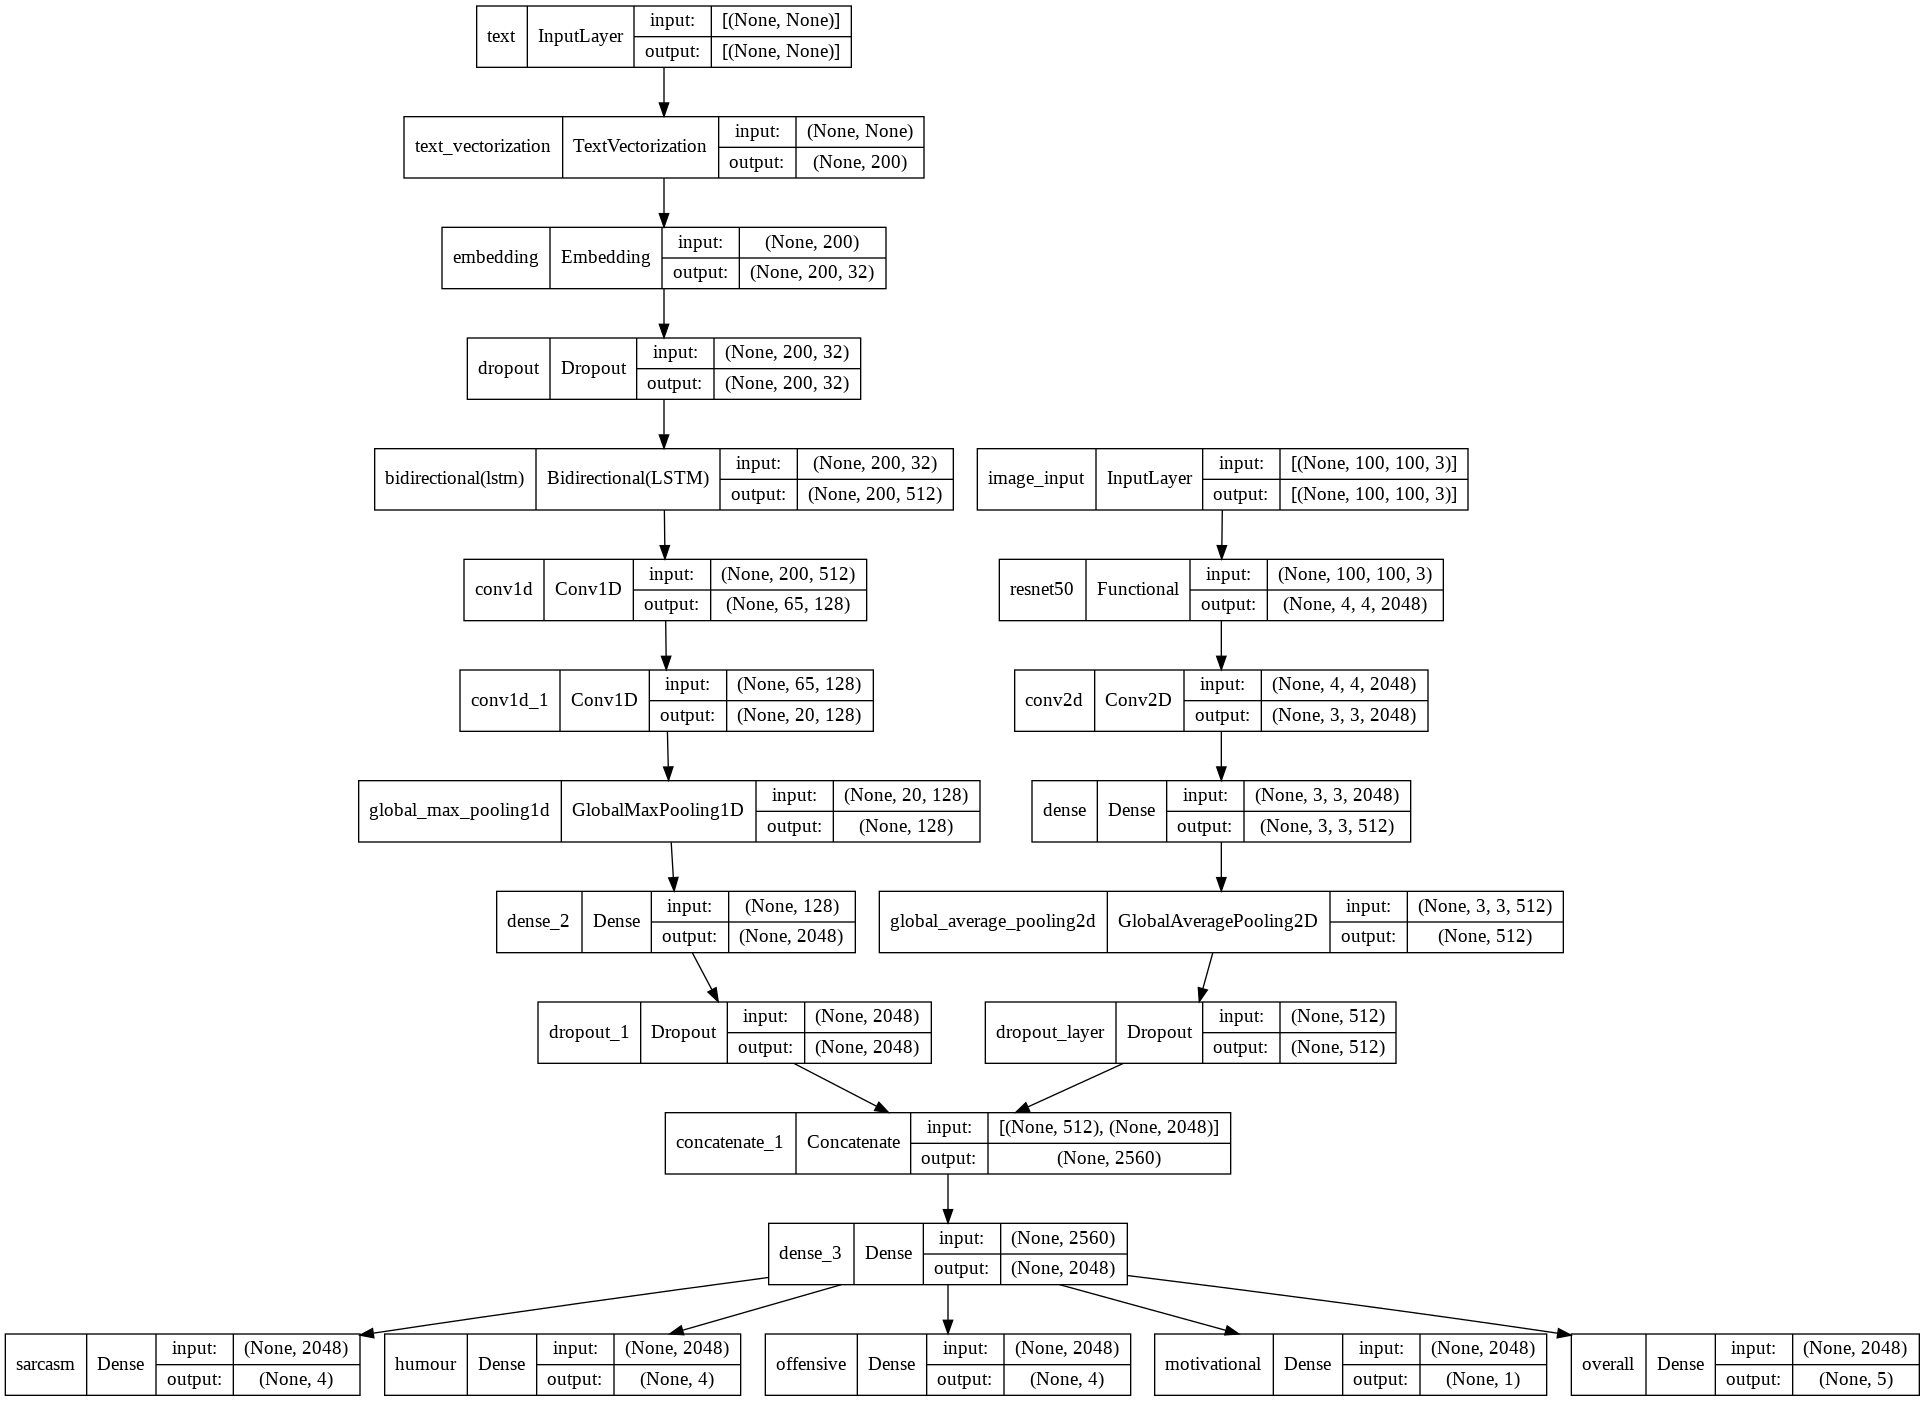

In [ ]:
base_learning_rate = 0.01
losses = {
      "humour": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
      "sarcasm": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
      "offensive": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
      "motivational": tf.keras.losses.BinaryCrossentropy(from_logits=False),
      "overall": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
}



metric = {
    "humour": ['acc',tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.9)],
    "sarcasm": ['acc',tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.9)],
    "offensive": ['acc',tfa.metrics.F1Score(num_classes=4, average="micro", threshold = 0.9)],
    "motivational": ['acc',tfa.metrics.F1Score(num_classes=1, average="micro", threshold = 0.9)],
    "overall": ['acc',tfa.metrics.F1Score(num_classes=5, average="micro", threshold = 0.9)]
}
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss = losses,
              metrics=metric)


tf.keras.utils.plot_model(model, to_file="Model.png", show_shapes=True)

This is an alternative way to Gridsearch for tuning hyperparameters to get the best ones so that the model would be more accurate.

In [ ]:
learning_rates = [0.1, 0.0000000001]
for i in learning_rates:
  model.compile(optimizer=tf.keras.optimizers.RMSprop(i),
                loss = losses,

                metrics=['accuracy'])
  
  history = model.fit(x = {"image_input": X_train, "text": X_text_train},
                      y = {"sarcasm": y_train.sarcasm, 
                           "humour": y_train.humour, 
                           "offensive": y_train.offensive, 
                           "motivational": y_train.motivational, 
                           "overall": y_train.overall_sentiment},
                      batch_size=16,
                      validation_split = 0.2,
                      epochs=5,
                      verbose=1)

Epoch 1/5
280/280 [==============================] - 678s 2s/step - loss: 5.6727 - sarcasm_loss: 1.1955 - humour_loss: 1.3163 - offensive_loss: 1.2065 - motivational_loss: 0.6550 - overall_loss: 1.2995 - sarcasm_accuracy: 0.4984 - humour_accuracy: 0.3429 - offensive_accuracy: 0.3695 - motivational_accuracy: 0.6437 - overall_accuracy: 0.4291 - val_loss: 5.6259 - val_sarcasm_loss: 1.1782 - val_humour_loss: 1.3617 - val_offensive_loss: 1.1557 - val_motivational_loss: 0.6466 - val_overall_loss: 1.2837 - val_sarcasm_accuracy: 0.5094 - val_humour_accuracy: 0.3420 - val_offensive_accuracy: 0.4244 - val_motivational_accuracy: 0.6526 - val_overall_accuracy: 0.4360
Epoch 2/5
280/280 [==============================] - 663s 2s/step - loss: 5.6658 - sarcasm_loss: 1.1957 - humour_loss: 1.3163 - offensive_loss: 1.2071 - motivational_loss: 0.6559 - overall_loss: 1.2907 - sarcasm_accuracy: 0.5054 - humour_accuracy: 0.3310 - offensive_accuracy: 0.3601 - motivational_accuracy: 0.6477 - overall_accuracy: 

Train & validation for loss are quite same ($16 * 10^{-3}$) maximum difference between them (X axis), which means the model is stable & there's no overfitting. (X axis represent loss, Y represent epochs)

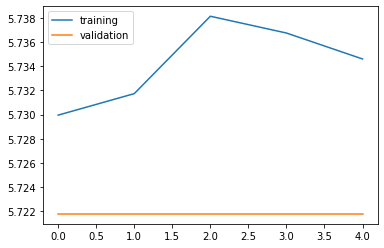

In [ ]:
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

## Notes

* We can see that the model have an accuracy of "*only*" 44% for over_all sentiment : In this case of models, this is natural (though it could be largely improved - I'll detail that just after-) as the multimodal neural network is based on multiple complex data types (images, text) in this project & more generally, on any 2 or more different data types. As example, this project combine both text & image to extract a sentiment from a meme. So if we consider a negative image & a positive text, will this be classified as overall positive or negative ? Not only classifying image is difficult but we had to combine that to text. So dependancies go increasing (from preprocessing, selection of transfer learning models (if they exists), & how to build the model) more complex combined data will surely result in a drop of accuracy

* Also, number of classes could add another difficulty since classifying these features into more classes would result in a more complex problem to treat & so would require more codes & preprocessing than that. As example, the binary classification for motivational is 65% meanwhile the other sentiments that have 4-5  ordinal values each goes from 30-50% only.

* In this project, the quantity of adta (though it's multimodal) is quite small & we know that for Deep Learning, training on huge amount of data is always beneficial, that's why the data size could also play a major role for model's efficiency.

* Things that could've been done : 

 * Using **BERT** library for NLP & other image TL libraries from tensorflow_hub.
 * Further preprocessing steps for images (different layer parameters).
 * Visualization for text part (such wordclouds).
 * More functions to limit big codes.

# References

* [Kaggle Memotion dataset 7k](https://www.kaggle.com/squaredr/memotion-analysis-on-image#Memotion-Analysis:-Sentiment-Analysis-of-Memes)

* [Plot tensorflow model with keras API](https://towardsdatascience.com/plot-a-tensorflow-model-with-keras-functional-api-f2db639dbbd8)

* [Sunburst Tutorial](https://plotly.com/python/sunburst-charts/)

* [Multimodal Entailment](https://keras.io/examples/nlp/multimodal_entailment/)

* [Transfer Learning](https://github.com/Gbolahan-Aziz/Transfer-Learning-with-MobileNet/blob/master/Transfer_Learning.ipynb)

* [Display interactive figures within notebook as html from colab](https://medium.com/@282abhishek/using-plotly-with-nbconvert-in-google-colab-96834c4f2850)

* My previous workshops & projects



In [34]:
%%shell
jupyter nbconvert --to html /content/Final_Project_Deep_Learning.ipynb

[NbConvertApp] Converting notebook /content/Final_Project_Deep_Learning.ipynb to html
[NbConvertApp] Writing 4545820 bytes to /content/Final_Project_Deep_Learning.html
